In [173]:
# I save my Regression and Visualization imports as a macro in store 
%store -r _importR 

In [174]:
_importR

In [175]:
pwd

'/Users/TJR/Desktop/algorithm_projects'

In [176]:
import warnings
warnings.filterwarnings('ignore')

In [177]:
# Loading the dataset - https://archive.ics.uci.edu/ml/datasets/Beijing+PM2.5+Data
air = pd.read_csv("/Users/TJR/Desktop/beijing_air_quality.csv")

In [178]:
# I set parameters so that the entire frame is shown - all rows all columns 
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
air.head(10)

,index,year,month,day,hour,particulate_matter,dew_point,temp,pressure,wind_direction,wind_speed,snow,rain
0,25,2010,1,2,0,129,-16,-4.0,1020.0,SE,1.79,0,0
1,26,2010,1,2,1,148,-15,-4.0,1020.0,SE,2.68,0,0
2,27,2010,1,2,2,159,-11,-5.0,1021.0,SE,3.57,0,0
3,28,2010,1,2,3,181,-7,-5.0,1022.0,SE,5.36,1,0
4,29,2010,1,2,4,138,-7,-5.0,1022.0,SE,6.25,2,0
5,30,2010,1,2,5,109,-7,-6.0,1022.0,SE,7.14,3,0
6,31,2010,1,2,6,105,-7,-6.0,1023.0,SE,8.93,4,0
7,32,2010,1,2,7,124,-7,-5.0,1024.0,SE,10.72,0,0
8,33,2010,1,2,8,120,-8,-6.0,1024.0,SE,12.51,0,0
9,34,2010,1,2,9,132,-7,-5.0,1025.0,SE,14.30,0,0


In [179]:
# Beginning the traditional data EDA and clean-up

In [180]:
# Checking for null values 
missing_df = air.isnull().sum(axis=0).reset_index()
missing_df.columns = ['feature', 'missing variables']
missing_df['complete (%)']=(air.shape[0]-missing_df['missing variables'])/air.shape[0]*100
missing_df.sort_values('complete (%)').reset_index(drop = True)

,feature,missing variables,complete (%)
0,index,0,100.0
1,year,0,100.0
2,month,0,100.0
3,day,0,100.0
4,hour,0,100.0
5,particulate_matter,0,100.0
6,dew_point,0,100.0
7,temp,0,100.0
8,pressure,0,100.0
9,wind_direction,0,100.0


In [181]:
# Giving the dataset a proper index 
air.reset_index().head(10)

,level_0,index,year,month,day,hour,particulate_matter,dew_point,temp,pressure,wind_direction,wind_speed,snow,rain
0,0,25,2010,1,2,0,129,-16,-4.0,1020.0,SE,1.79,0,0
1,1,26,2010,1,2,1,148,-15,-4.0,1020.0,SE,2.68,0,0
2,2,27,2010,1,2,2,159,-11,-5.0,1021.0,SE,3.57,0,0
3,3,28,2010,1,2,3,181,-7,-5.0,1022.0,SE,5.36,1,0
4,4,29,2010,1,2,4,138,-7,-5.0,1022.0,SE,6.25,2,0
5,5,30,2010,1,2,5,109,-7,-6.0,1022.0,SE,7.14,3,0
6,6,31,2010,1,2,6,105,-7,-6.0,1023.0,SE,8.93,4,0
7,7,32,2010,1,2,7,124,-7,-5.0,1024.0,SE,10.72,0,0
8,8,33,2010,1,2,8,120,-8,-6.0,1024.0,SE,12.51,0,0
9,9,34,2010,1,2,9,132,-7,-5.0,1025.0,SE,14.30,0,0


In [182]:
air.drop(['index'], axis=1, inplace=True)

In [183]:
air.drop(['wind_direction'], axis=1,inplace=True)

In [184]:
air.head(10)

,year,month,day,hour,particulate_matter,dew_point,temp,pressure,wind_speed,snow,rain
0,2010,1,2,0,129,-16,-4.0,1020.0,1.79,0,0
1,2010,1,2,1,148,-15,-4.0,1020.0,2.68,0,0
2,2010,1,2,2,159,-11,-5.0,1021.0,3.57,0,0
3,2010,1,2,3,181,-7,-5.0,1022.0,5.36,1,0
4,2010,1,2,4,138,-7,-5.0,1022.0,6.25,2,0
5,2010,1,2,5,109,-7,-6.0,1022.0,7.14,3,0
6,2010,1,2,6,105,-7,-6.0,1023.0,8.93,4,0
7,2010,1,2,7,124,-7,-5.0,1024.0,10.72,0,0
8,2010,1,2,8,120,-8,-6.0,1024.0,12.51,0,0
9,2010,1,2,9,132,-7,-5.0,1025.0,14.30,0,0


In [214]:
air_datetime = air.groupby(['year','month','day'])['particulate_matter'].mean()
air_datetime = pd.DataFrame(air_datetime) 
air_timeseries = air_datetime.reset_index()
air_timeseries = pd.to_datetime((air_timeseries.year*10000+air_timeseries.month*100+air_timeseries.day).apply(str),format='%Y%m%d')
air_timeseries = pd.DataFrame(air_timeseries)
air_timeseries.head()

,0
0,2010-01-02
1,2010-01-03
2,2010-01-04
3,2010-01-05
4,2010-01-06


In [215]:
air_datetime.reset_index(drop = True, inplace = True)
air_datetime.head()

,particulate_matter
0,145.958333
1,78.833333
2,31.333333
3,42.458333
4,56.416667


In [216]:
air_time = pd.concat([air_timeseries, air_datetime], axis=1,sort=False)
air_time = air_time.set_index([0])
air_time.head()

,particulate_matter
0,
2010-01-02,145.958333
2010-01-03,78.833333
2010-01-04,31.333333
2010-01-05,42.458333
2010-01-06,56.416667


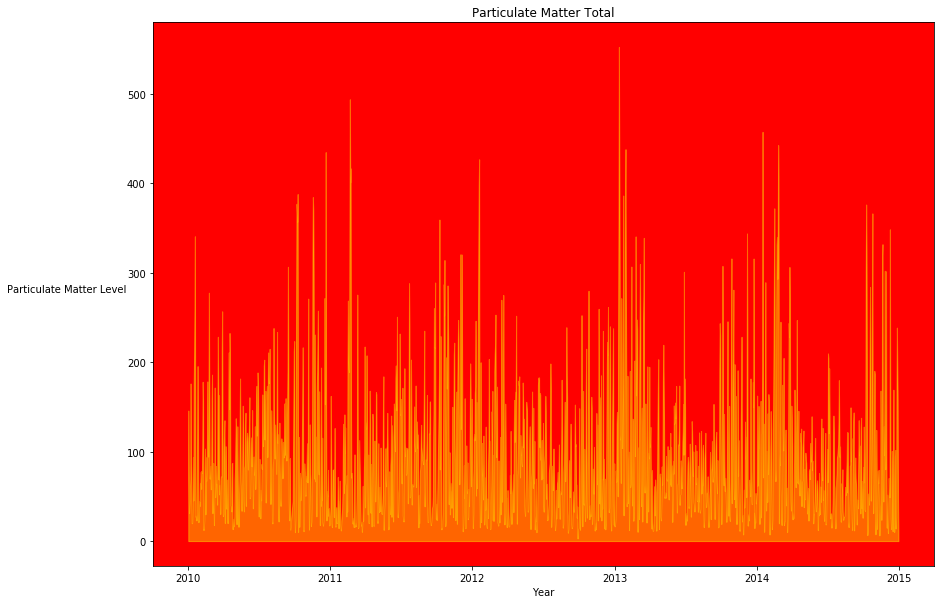

In [188]:
x=air_time.index
y=air_time.particulate_matter

plt.figure(figsize=(14,10))
plt.fill_between( x, y, color="yellow", alpha=0.4)
ax = plt.gca()
ax.set_facecolor('red')
plt.xlabel('Year')
plt.ylabel('Particulate Matter Level', rotation=0, labelpad=60)
plt.title('Particulate Matter Total')
plt.show()

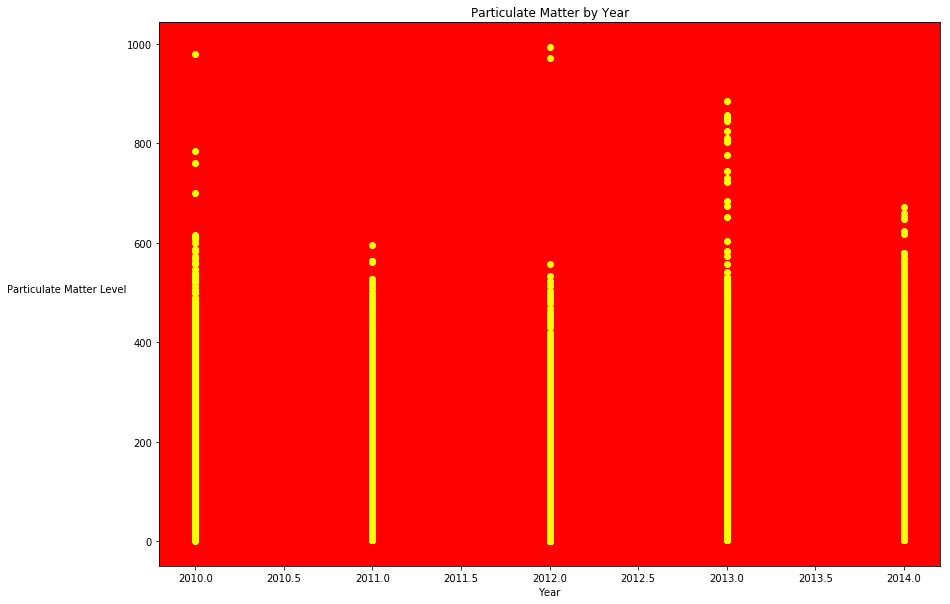

In [189]:
x =  air['year']
y = air['particulate_matter']

plt.figure(figsize=(14,10))
plt.scatter(x,y,color='yellow')
ax = plt.gca()
ax.set_facecolor('red')
plt.xlabel('Year')
plt.ylabel('Particulate Matter Level', rotation=0, labelpad=60)
plt.title('Particulate Matter by Year')
plt.show()

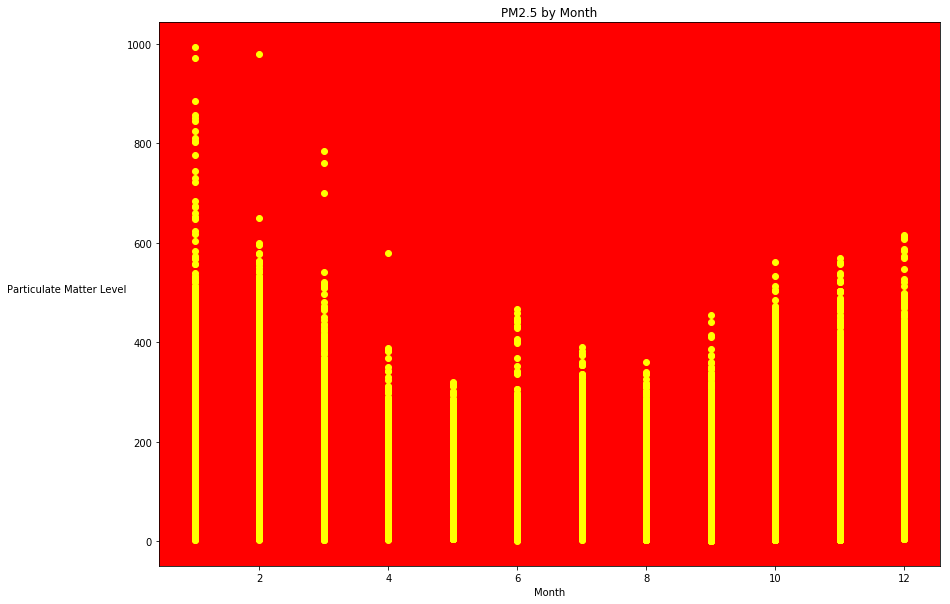

In [190]:
x =  air['month']
y = air['particulate_matter']

plt.figure(figsize=(14,10))
plt.scatter(x,y,color='yellow')
ax = plt.gca()
ax.set_facecolor('red')
plt.xlabel('Month')
plt.ylabel('Particulate Matter Level', rotation=0, labelpad=60)
plt.title('PM2.5 by Month')
plt.show()

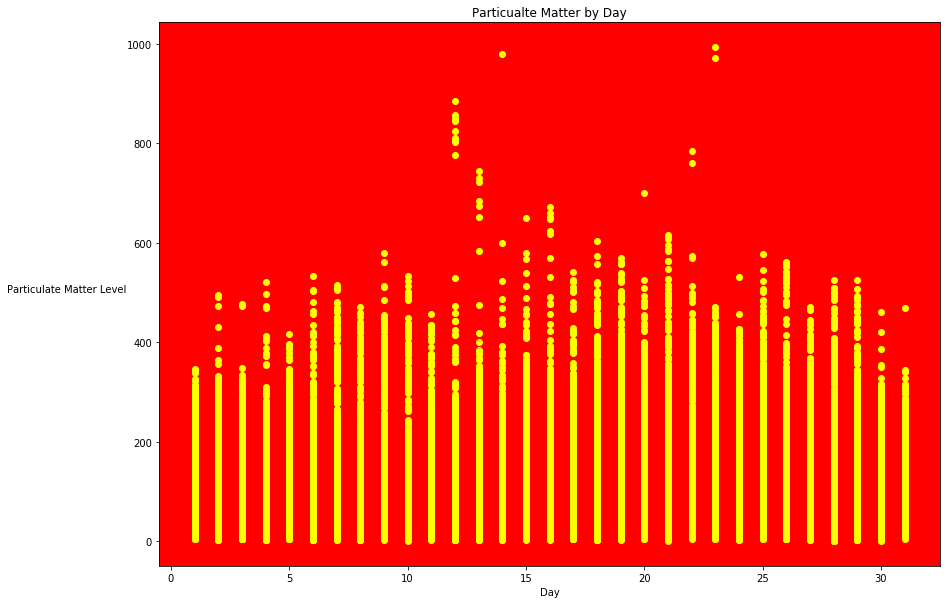

In [191]:
x =  air['day']
y = air['particulate_matter']

plt.figure(figsize=(14,10))
plt.scatter(x,y,color='yellow')
ax = plt.gca()
ax.set_facecolor('red')
plt.xlabel('Day')
plt.ylabel('Particulate Matter Level', rotation=0, labelpad=60)
plt.title('Particualte Matter by Day')
plt.show()

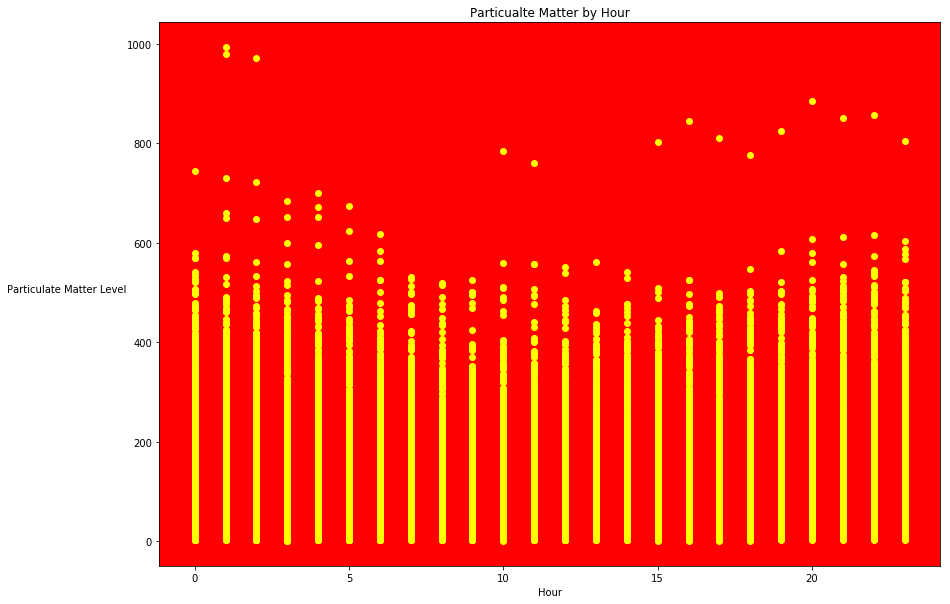

In [192]:
x =  air['hour']
y = air['particulate_matter']

plt.figure(figsize=(14,10))
plt.scatter(x,y,color='yellow')
ax = plt.gca()
ax.set_facecolor('red')
plt.xlabel('Hour')
plt.ylabel('Particulate Matter Level',rotation=0, labelpad=60)
plt.title('Particualte Matter by Hour')
plt.show()

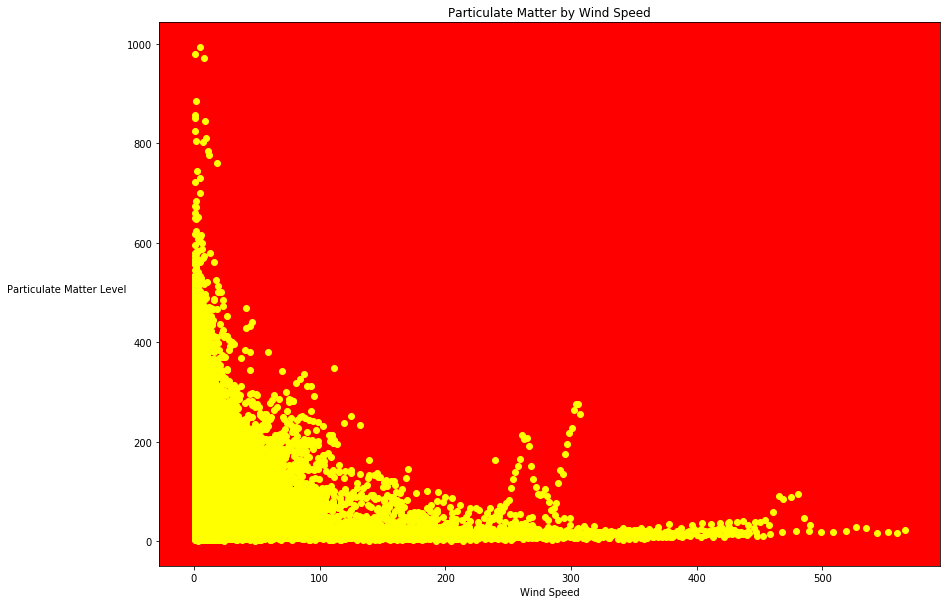

In [193]:
x =  air['wind_speed']
y = air['particulate_matter']

plt.figure(figsize=(14,10))
plt.scatter(x,y,color='yellow')
ax = plt.gca()
ax.set_facecolor('red')
plt.xlabel('Wind Speed')
plt.ylabel('Particulate Matter Level',rotation=0, labelpad=60)
plt.title('Particulate Matter by Wind Speed')
plt.show()

In [194]:
hm = air.corr()

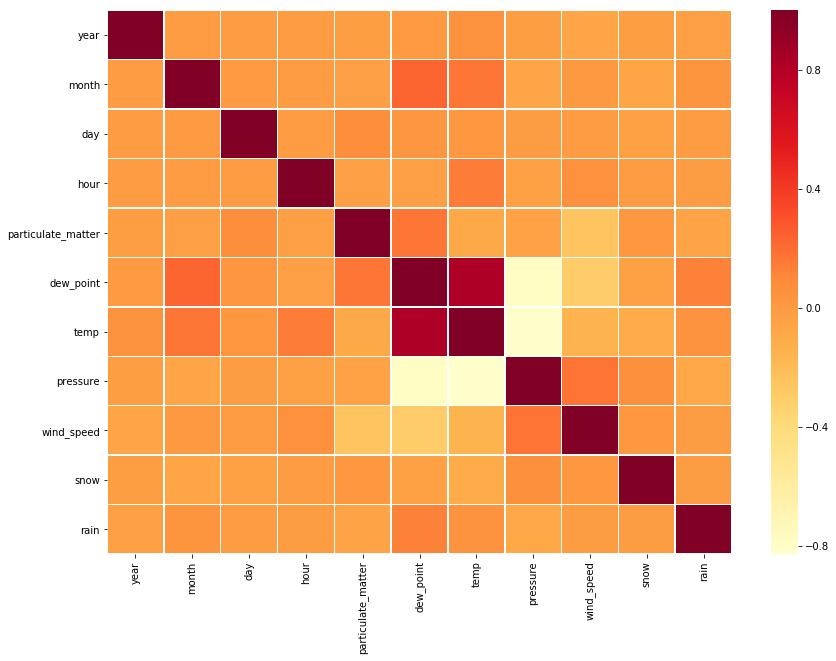

In [195]:
plt.figure(figsize=(14,10))
sns.heatmap(hm, linewidth=.5,cmap="YlOrRd")

In [196]:
from sklearn.linear_model import LinearRegression
from sklearn.cross_validation import cross_val_score, train_test_split
from sklearn import metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import statsmodels.formula.api as smf
from math import sqrt

In [197]:
X = air.drop(['particulate_matter'], axis=1)
y = air.particulate_matter

In [198]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.25, random_state=3)

In [199]:
lr = LinearRegression()
lr.fit(X_train, y_train)
lr_score = lr.score(X_test,y_test)
lr_pred = lr.predict(X_test)

print('Predictions are: ',lr_pred)
print('Score is: ',lr_score)

Predictions are:  [109.68561633 141.65897392 142.97819234 ...  88.35920503 125.04176159
 123.74769022]
Score is:  0.2678284030144392


In [200]:
print("Root mean squared error: %.2f"
      % sqrt(mean_squared_error(y_test, lr_pred)))
print("Mean absolute error: %.2f"
      % mean_absolute_error(y_test, lr_pred))
# Explained Variance Score
print('R-squared: %.2f' % r2_score(y_test, lr_pred))

Root mean squared error: 78.01
Mean absolute error: 57.08
R-squared: 0.27


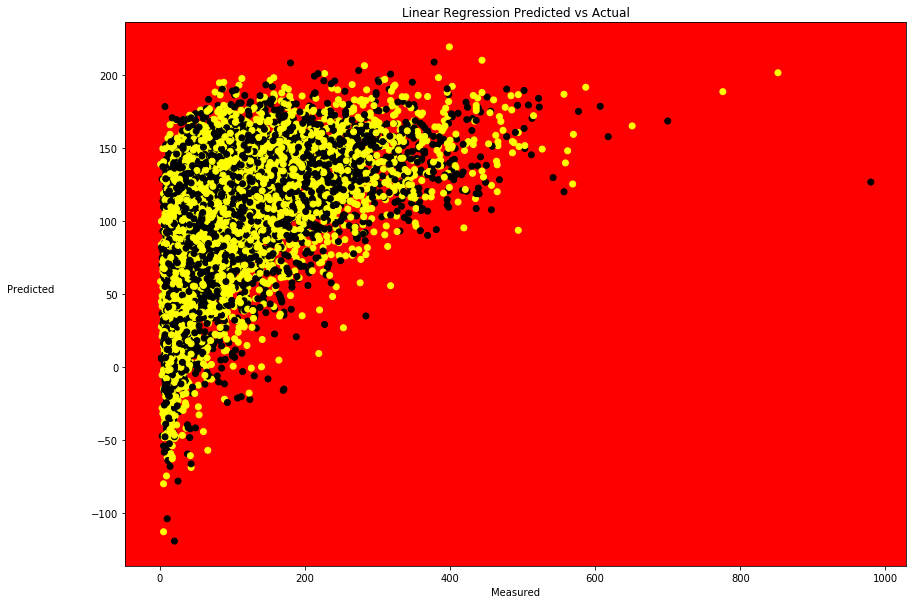

In [201]:
plt.figure(figsize=(14,10))
plt.scatter(y_test, lr_pred,color=['black','yellow'])
ax = plt.gca()
ax.set_facecolor('red')
plt.xlabel('Measured')
plt.ylabel('Predicted', rotation=0, labelpad=60)
plt.title('Linear Regression Predicted vs Actual')
plt.show()

In [202]:
X = air.drop(['particulate_matter'], axis=1)
y = air.particulate_matter

In [203]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.25, random_state=3)

In [204]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

tree_1 = DecisionTreeRegressor()

tree_2 = AdaBoostRegressor(DecisionTreeRegressor(), n_estimators=200, learning_rate=.1)

In [205]:
tree_1.fit(X_train, y_train)
tree_2.fit(X_train, y_train)

AdaBoostRegressor(base_estimator=DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best'),
         learning_rate=0.1, loss='linear', n_estimators=200,
         random_state=None)

In [206]:
tree_1.score(X_test, y_test)

0.6928618968872194

In [207]:
boosted_tree_score = tree_2.score(X_test, y_test)
boosted_tree_score

0.886612460395625

In [208]:
tree_1_pred = tree_1.predict(X_test)
tree_2_pred = tree_2.predict(X_test)

In [209]:
print("Root mean squared error: %.2f"
      % sqrt(mean_squared_error(y_test, tree_2_pred)))
print("Mean absolute error: %.2f"
      % mean_absolute_error(y_test, tree_2_pred))
# Explained Variance Score
print('R-squared: %.2f' % r2_score(y_test, tree_2_pred))

Root mean squared error: 30.70
Mean absolute error: 16.50
R-squared: 0.89


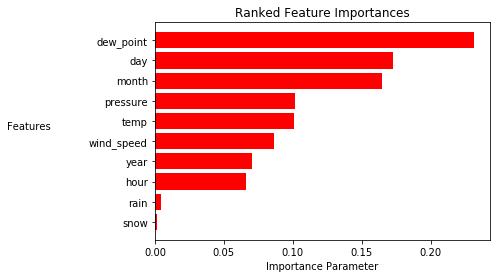

In [210]:
features = X.columns
importances = tree_2.feature_importances_
indices = np.argsort(importances)

plt.title('Ranked Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='r', align='center')
plt.yticks(range(len(indices)), features[indices])
plt.xlabel('Importance Parameter')
plt.ylabel('Features', rotation=0, labelpad=60)
plt.show()

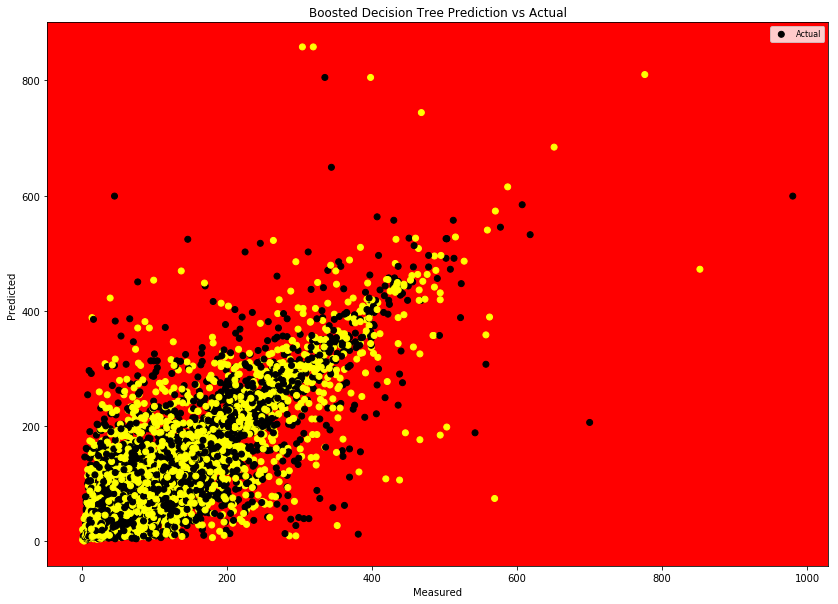

In [211]:
plt.figure(figsize=(14,10))
plt.scatter(y_test, tree_1_pred, color=['black','yellow'])
ax = plt.gca()
ax.set_facecolor('red')
plt.xlabel('Measured')
plt.ylabel('Predicted')
plt.title('Boosted Decision Tree Prediction vs Actual')
plt.legend(('Actual',''),
scatterpoints=1,
loc='top right',
           fontsize=8)
plt.show()

In [212]:
print("Scores:""Scores:")
print("Linear regression score: ", lr_score)
print("Boosted decision tree score: ", boosted_tree_score)
print("\n")
print("RMSE:")
print("Linear regression RMSE: %.2f"
      % sqrt(mean_squared_error(y_test, lr_pred)))
print("Boosted decision tree RMSE: %.2f"
      % sqrt(mean_squared_error(y_test, tree_2_pred)))

Scores:Scores:
Linear regression score:  0.2678284030144392
Boosted decision tree score:  0.886612460395625


RMSE:
Linear regression RMSE: 78.01
Boosted decision tree RMSE: 30.70


In [213]:
print('Boosted decision tree score:  88.8 - This model predicts at an 88% acuracy rate')

Boosted decision tree score:  88.8 - This model predicts at an 88% acuracy rate
